In [1]:
# 线性模型 ŷ = w[0] * x[0] + w[1] * x[1] + … + w[p] * x[p] + b
import mglearn
%matplotlib inline
import matplotlib.pyplot as plt

w[0]: 0.393906  b: -0.031804


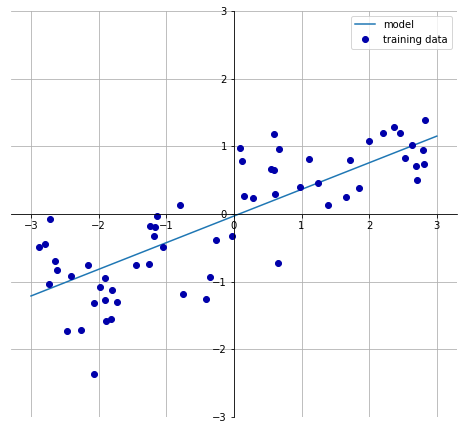

In [4]:
mglearn.plots.plot_linear_regression_wave()

In [5]:
# 线性回归（普通最小二乘法）  没有参数，无法控制模型复杂度
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [6]:
# 斜率参数 w，也叫权重系数
lr.coef_

array([0.39390555])

In [7]:
# 偏移参数 b，也叫截距
lr.intercept_

-0.031804343026759746

In [8]:
lr.score(X_train, y_train)

0.6700890315075756

In [9]:
lr.score(X_test, y_test)

0.65933685968637

In [10]:
# ----------------------------------------------------------------
X, y =mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [14]:
lr.coef_

array([-4.12710947e+02, -5.22432068e+01, -1.31898815e+02, -1.20041365e+01,
       -1.55107129e+01,  2.87163342e+01,  5.47040992e+01, -4.95346659e+01,
        2.65823927e+01,  3.70620316e+01, -1.18281674e+01, -1.80581965e+01,
       -1.95246830e+01,  1.22025403e+01,  2.98078144e+03,  1.50084257e+03,
        1.14187325e+02, -1.69700520e+01,  4.09613691e+01, -2.42636646e+01,
        5.76157466e+01,  1.27812142e+03, -2.23986944e+03,  2.22825472e+02,
       -2.18201083e+00,  4.29960320e+01, -1.33981515e+01, -1.93893485e+01,
       -2.57541277e+00, -8.10130128e+01,  9.66019367e+00,  4.91423718e+00,
       -8.12114800e-01, -7.64694179e+00,  3.37837099e+01, -1.14464390e+01,
        6.85083979e+01, -1.73753604e+01,  4.28128204e+01,  1.13988209e+00,
       -7.72696840e-01,  5.68255921e+01,  1.42875996e+01,  5.39551110e+01,
       -3.21709644e+01,  1.92709675e+01, -1.38852338e+01,  6.06343266e+01,
       -1.23153942e+01, -1.20041365e+01, -1.77243899e+01, -3.39868183e+01,
        7.08999816e+00, -

In [12]:
lr.intercept_

30.934563673640433

In [15]:
lr.score(X_train, y_train)

0.9520519609032728

In [16]:
lr.score(X_test, y_test)

0.6074721959666309

In [17]:
# ------------------------------------------------------------------
# 正则化是指对模型做显示约束，以避免过拟合

In [27]:
# 岭回归   Ridge使用了L2正则化约束，降低了过拟合
# L2正则化使w系数接近于0
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [29]:
# Ridge模型可以设置alpha参数调节模型性能，默认值1.0
# 增大alpha会使得系数更加趋向于0，正则化越强，从而降低训练集性能，但可能会提高泛化性能
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [30]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


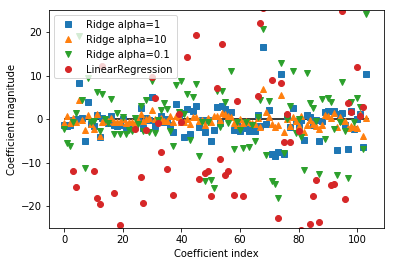

In [33]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

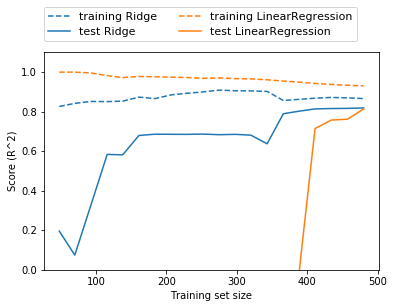

In [35]:
# 学习曲线：将模型性能作为数据集大小的函数进行绘图，这样的图像叫作学习曲线
mglearn.plots.plot_ridge_n_samples()
# 岭回归和线性回归在波士顿房价数据集上的学习曲线
# 如果有足够多的训练数据，正则化变得不那么重要，并且岭回归和线性回归将具有相同的性能

In [36]:
# ----------------------------------------------------------

In [41]:
# Lass模型, lass使用的正则化是L1
# L1正则化的结果是，使某些系数刚好为0，这说明某些特征被模型完全忽略，可以看做是特征选择
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_!=0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [43]:
lasso.intercept_

26.124530144985922

In [50]:
# lasso模型的alpha参数设置正则化强度默认值1.0，调整alpha还要调整max_iter参数(运行迭代的最大次数)
lasso001 = Lasso(alpha=0.01,max_iter=100000).fit(X_train, y_train)
print("Training set score:{:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score:{:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_!=0)))

Training set score:0.90
Test set score:0.77
Number of features used: 33


In [51]:
lasso00001 = Lasso(alpha=0.0001,max_iter=100000).fit(X_train, y_train)
print("Training set score:{:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score:{:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_!=0)))

Training set score:0.95
Test set score:0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

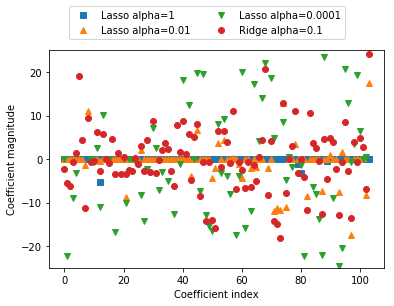

In [61]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0.06, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

In [62]:
# 在实践中，在两个模型中一般首选岭回归。但如果特征很多，你认为只有其中几个是重要的，
# 那么选择 Lasso 可能更好。同样，如果你想要一个容易解释的模型，Lasso 可以给出更容易理解
# 的模型，因为它只选择了一部分输入特征。
# scikit-learn 还提供了 ElasticNet类，结合了 Lasso 和 Ridge 的惩罚项。在实践中，
# 这种结合的效果最好，不过代价是要调节两个参数：一个用于 L1 正则化，一个用于 L2 正则化。

In [63]:
# -------------------------------------------------------------------

In [64]:
# 用于分类的线性模型    对于用于分类的线性模型，决策边界是输入的线性函数
# 二分类公式 ：ŷ = w[0] * x[0] + w[1] * x[1] + …+ w[p] * x[p] + b > 0
# 常见用于分类的线性模型：Logistic回归(逻辑回归)、线性支持向量机(线性SVM),都默认L2正则化

d:\pyenv\ml3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
d:\pyenv\ml3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


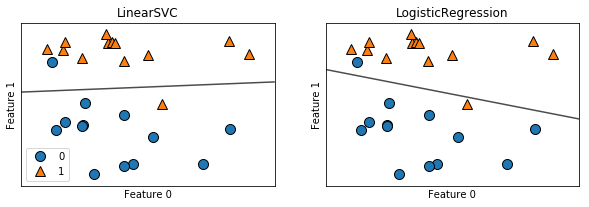

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2, figsize=(10,3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

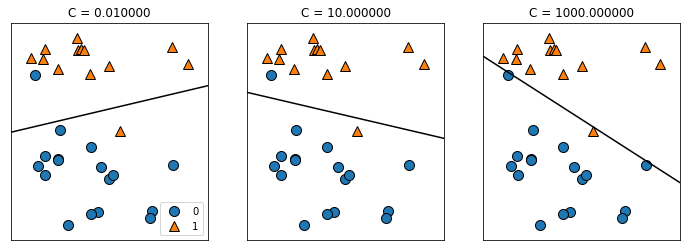

In [81]:
# 对于LogisticRegression和LinearSVC，决定正则化强度的权衡参数是C,C越大对应正则化越弱，
# 默认值1，而C越小，模型更强调使系数向量w接近于0
mglearn.plots.plot_linear_svc_regularization()
# 不同C值的线性SVM在forge数据集上的决策边界

In [103]:
# 乳腺癌数据使用逻辑回归
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target,random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score:{:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score:{:.3f}".format(logreg.score(X_test, y_test)))

Training set score:0.946
Test set score:0.958


d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [104]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score:{:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score:{:.3f}".format(logreg100.score(X_test, y_test)))

Training set score:0.948
Test set score:0.965


d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [122]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score:{:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score:{:.3f}".format(logreg001.score(X_test, y_test)))

Training set score:0.934
Test set score:0.930


d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


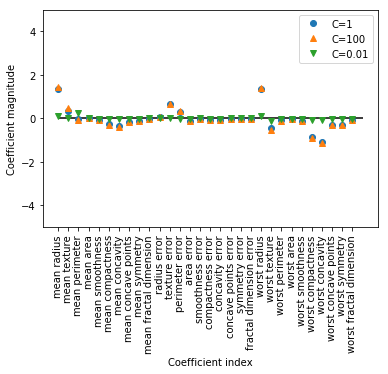

In [135]:
# 对比不同C值时Logistic回归在乳腺癌数据集上学到的系数
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.010: 0.92
Test sccuracy of l1 logreg with C=0.010: 0.93
Training accuracy of l1 logreg with C=1.000: 0.96
Test sccuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test sccuracy of l1 logreg with C=100.000: 0.98


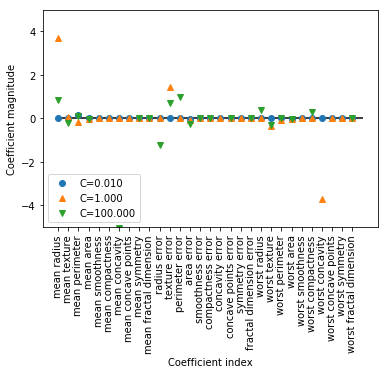

In [136]:
# 使用L1正则化进行对比
for C, marker in zip([0.01, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C,penalty="l1",solver='liblinear').fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, 
                                                lr_l1.score(X_train, y_train)))
    print("Test sccuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, 
                                                lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

In [ ]:
# 用于多分类的线性模型
# 将二分类算法推广到多分类算法的一种常见方法就是“一对其余”
# 分类置信方程最大值对应的类别为输出 ：w[0] * x[0] + w[1] * x[1] + … + w[p] * x[p] + b

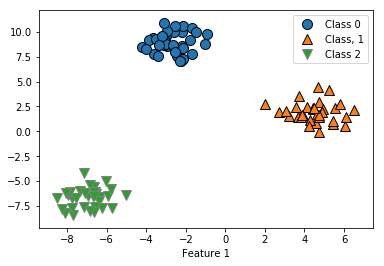

In [143]:
# 三分类数据集
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("Feature 0")
plt.xlabel("Feature 1")
plt.legend(["Class 0", "Class, 1", "Class 2"])

In [144]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


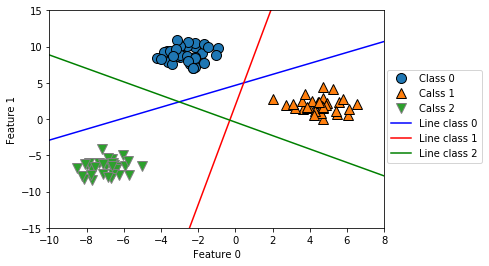

In [158]:
# 三个“一对其余”分类器学到的决策边界
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, 
                                  ['b','r','g']):
    plt.plot(line, -(line*coef[0] + intercept)/coef[1], c=color)
plt.ylim(-15, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Calss 1', 'Calss 2', 'Line class 0', 'Line class 1', 
            'Line class 2'], loc=(1.01,0.3))

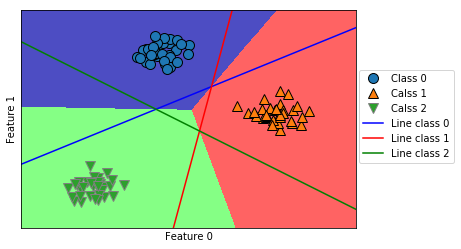

In [160]:
# 都被划分为其余的区域，选分类置信方程结果最大的类别
# 二维展示
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, 
                                  ['b','r','g']):
    plt.plot(line, -(line*coef[0] + intercept)/coef[1], c=color)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Calss 1', 'Calss 2', 'Line class 0', 'Line class 1', 
            'Line class 2'], loc=(1.01,0.3))
    